# RNN: Clasificación - Predicción calidad del vino

In [1]:
# Librerias


# Tratamiento de los datos
import kagglehub
import pandas as pd
import numpy as np

# Gráficos

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modelado

from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
from sklearn.neural_network import MLPClassifier
import multiprocessing

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

## Introducción

### ¿Qué es una red neuronal artificial?
Una red neuronal artificial es un modelo computacional inspirado en el funcionamiento del cerebro humano, las cuales están compuestas por unidades llamadas neuronas que están organizadas en capas, las cuales incluyen una capa de entrada, una o más capas ocultas y una capa de salida.

Algunos puntos claves de una red neuronal artificial son:
- **Neuronas**: Cada neurona recibe una entrada, la procesa y esto produce una salida. Las conexiones entre neuronas tienen pesos que se ajustan durante el entrenamiento.
- **Entrenamiento**: Se entrenan usando datos y durante el mismo la red neuronal ajusta los pesos de las conexiones para minimizar el error en la predicción.
- **Aplicaciones**: Se utilizan en diferentes campos, como reconocimiento de imágenes, procesamiento del lenguaje natural y predicción de datos.

### ¿Por qué son importantes?
Las redes neuronales son importantes por diferentes razones:
- **Capacidad de aprendizaje**: Pueden aprender y mejorar a partir de datos, lo cual les permite realizar tareas complejas sin ser explícitamente programadas para cada una de ellas.
- **Versatilidad**: Se utilizan en una amplia gama de aplicaciones, desde el reconocimiento de voz, traducción automática, detección de fraudes, diagnóstico médico, entre otros.
- **Precisión**: En muchos casos, superan a los métodos tradicionales en términos de precisión y eficiencia.
- **Automatización**: Ayudan a automatizar procesos que antes requerían intervención humana, lo cual ayuda a aumentar la productividad y reducir costos.

### ¿Qué problema específico van a resolver (por ejemplo, clasificación de datos sintéticos o MNIST)?
Las mismas pueden resolver una variedad de problemas, como por ejemplo:
- **Clasificación de datos sintéticos**: Las redes pueden clasificar datos generados artificialmente para probar y validar modelos.
- **MNIST**: Conjunto de datos muy conocido que contiene imágenes de dígitos escritos a mano, donde se utilizan las redes neuronales para reconocer y clasificar con alta precisión.
- **Reconocimiento de imágenes**: Capaz de identificar y clasificar objetos en imágenes, lo cual ayuda a aplicaciones como la visión por computadora y la conducción autónoma.
- **Procesamiento de lenguaje natural**: Se utilizan para tareas como la traducción automática, el análisis de sentimientos y la generación de texto.
- **Detección de fraudes**: Ayuda a identificar patrones sospechosos en transacciones financieras para prevenir fraudes.

### Breve explicación del dataset elegido
El dataset elegido contiene información de características de diferentes vinos y al final son clasificados por calidad en la variable "quality".

Aquí el detalle con la información de cada atributo en el dataset:
- **Acidez fija**: La mayoría de los ácidos involucrados en el vino son fijos o no volátiles.
- **Acidez volátil**: La cantidad de ácido acético en el vino.
- **Ácido cítrico**: La cantidad de ácido cítrico en el vino.
- **Azúcar residual**: La cantidad de azúcar que queda después de que la fermentación se detiene.
- **Cloruros**: La cantidad de sal en el vino.
- **Dióxido de azufre libre**: La cantidad de dióxido de azufre libre en el vino (aquellos disponibles para reaccionar y, por lo tanto, exhibir propiedades germicidas y antioxidantes).
- **Dióxido de azufre total**: La cantidad de formas libres y combinadas de SO2.
- **Densidad**: La medida de cuán densamente está empaquetado un material.
- **pH**: Describe cuán ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4.
- **Alcohol**: El porcentaje de contenido de alcohol en el vino.
- **Calidad**: Variable de salida (basada en datos sensoriales, puntuación entre 3 y 8).

### Fundamentos teóricos 


El **perceptrón simple** es el modelo más básico de una neurona artificial, introducido por Frank Rosenblatt en 1958. Este modelo busca imitar el comportamiento de una neurona biológica, realizando una combinación lineal de las entradas y aplicando una función de activación para producir una salida. Matemáticamente, se representa como:

$$
y = f\left( \sum_{i=1}^n w_i x_i + b \right)
$$

Donde:

- \( x_i \) son las entradas.
- \( w_i \) son los pesos asociados a cada entrada.
- \( b \) es el sesgo o bias.
- \( f \) es la función de activación.

El perceptrón simple es capaz de resolver problemas de clasificación binaria para datos que son linealmente separables. Sin embargo, tiene limitaciones para resolver problemas más complejos que no son linealmente separables, como la función XOR.

### ¿Qué es una red neuronal multicapa?

Una **red neuronal multicapa** (o perceptrón multicapa, MLP por sus siglas en inglés) es una extensión del perceptrón simple que incorpora una o más capas ocultas entre la capa de entrada y la capa de salida. Esta arquitectura permite a la red aprender representaciones más complejas y resolver problemas que no son linealmente separables. Cada capa de la red está compuesta por múltiples neuronas, y la salida de una capa sirve como entrada para la siguiente.

### Explicación de conceptos claves

#### Propagación hacia adelante

La **propagación hacia adelante** es el proceso mediante el cual las entradas se transmiten a través de la red para generar una salida. En cada neurona de una capa \( l \), se calcula una combinación lineal de las entradas ponderadas y se aplica una función de activación:

1. **Combinación lineal**:

    $$
    z_j^{(l)} = \sum_{i=1}^{n_{l-1}} w_{ji}^{(l)} a_i^{(l-1)} + b_j^{(l)}
    $$

    Donde:

    - \( z_j^{(l)} \) es la entrada neta de la neurona \( j \) en la capa \( l \).
    - \( w_{ji}^{(l)} \) es el peso que conecta la neurona \( i \) de la capa \( l-1 \) con la neurona \( j \) de la capa \( l \).
    - \( a_i^{(l-1)} \) es la activación de la neurona \( i \) en la capa \( l-1 \).
    - \( b_j^{(l)} \) es el sesgo de la neurona \( j \) en la capa \( l \).

2. **Aplicación de la función de activación**:

    $$
    a_j^{(l)} = f(z_j^{(l)})
    $$

    Donde \( f \) es la función de activación, que introduce no linealidad en el modelo.

#### Funciones de activación

Las **funciones de activación** determinan si una neurona debe activarse o no, introduciendo no linealidad en la red y permitiendo que la red aprenda patrones complejos. Algunas funciones de activación comunes son:

- **Sigmoide**:

    $$
    f(z) = \frac{1}{1 + e^{-z}}
    $$

    Esta función mapea cualquier valor real al rango (0, 1).

- **Tangente hiperbólica (tanh)**:

    $$
    f(z) = \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
    $$

    Mapea valores al rango (-1, 1).

- **ReLU (Unidad Lineal Rectificada)**:

    $$
    f(z) = \max(0, z)
    $$

    Es una de las funciones más utilizadas debido a su simplicidad y eficacia en la práctica.

#### Cálculo del error

El **error** mide la discrepancia entre la salida predicha por la red y la salida deseada. Una función de error comúnmente utilizada es el **error cuadrático medio (MSE)**:

$$
E = \frac{1}{2} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

Donde:

- \( y_i \) es la salida deseada.
- \( \hat{y}_i \) es la salida predicha por la red.
- \( n \) es el número de muestras.

El factor \( \frac{1}{2} \) se incluye para simplificar la derivada durante el proceso de retropropagación.

#### Retropropagación

La **retropropagación** es el algoritmo utilizado para minimizar el error ajustando los pesos y sesgos de la red. Consiste en propagar el error desde la capa de salida hacia las capas anteriores, calculando los gradientes de los pesos y sesgos para actualizarlos en la dirección que minimice la función de error.

#### Gradiente descendente

El **gradiente descendente** es un método de optimización utilizado para minimizar funciones, en este caso, la función de error de la red neuronal. Se basa en actualizar los parámetros (pesos y sesgos) en la dirección opuesta al gradiente de la función de error con respecto a esos parámetros. La actualización de un peso \( w \) se realiza de la siguiente manera:

$$
w \leftarrow w - \eta \frac{\partial E}{\partial w}
$$

Donde:

- \( \eta \) es la tasa de aprendizaje, un hiperparámetro que determina el tamaño del paso de actualización.
- \( \frac{\partial E}{\partial w} \) es el gradiente de la función de error con respecto al peso \( w \).

#### Actualización de pesos y sesgos

Durante el entrenamiento de la red neuronal, los **pesos** (\( w \)) y **sesgos** (\( b \)) se actualizan iterativamente utilizando el gradiente descendente y la retropropagación. Las actualizaciones se realizan de la siguiente manera:

1. **Actualización de pesos**:

    $$
    w_{ji}^{(l)} \leftarrow w_{ji}^{(l)} - \eta \frac{\partial E}{\partial w_{ji}^{(l)}}
    $$

2. **Actualización de sesgos**:

    $$
    b_j^{(l)}
::contentReference[oaicite:0]{index=0}


## Preparación de datos

### Carga del dataset

In [2]:
df = pd.read_csv("winequality-red.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Análisis exploratorio

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Todas las columnas cuentan con el tipo de dato correcto, ahora verificaremos si hay algún dato ausente por variable

In [4]:
df.isna().sum().sort_values

<bound method Series.sort_values of fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64>

Todas las columnas están completas y no hay algún valor ausente

## Visualizacion de los datos

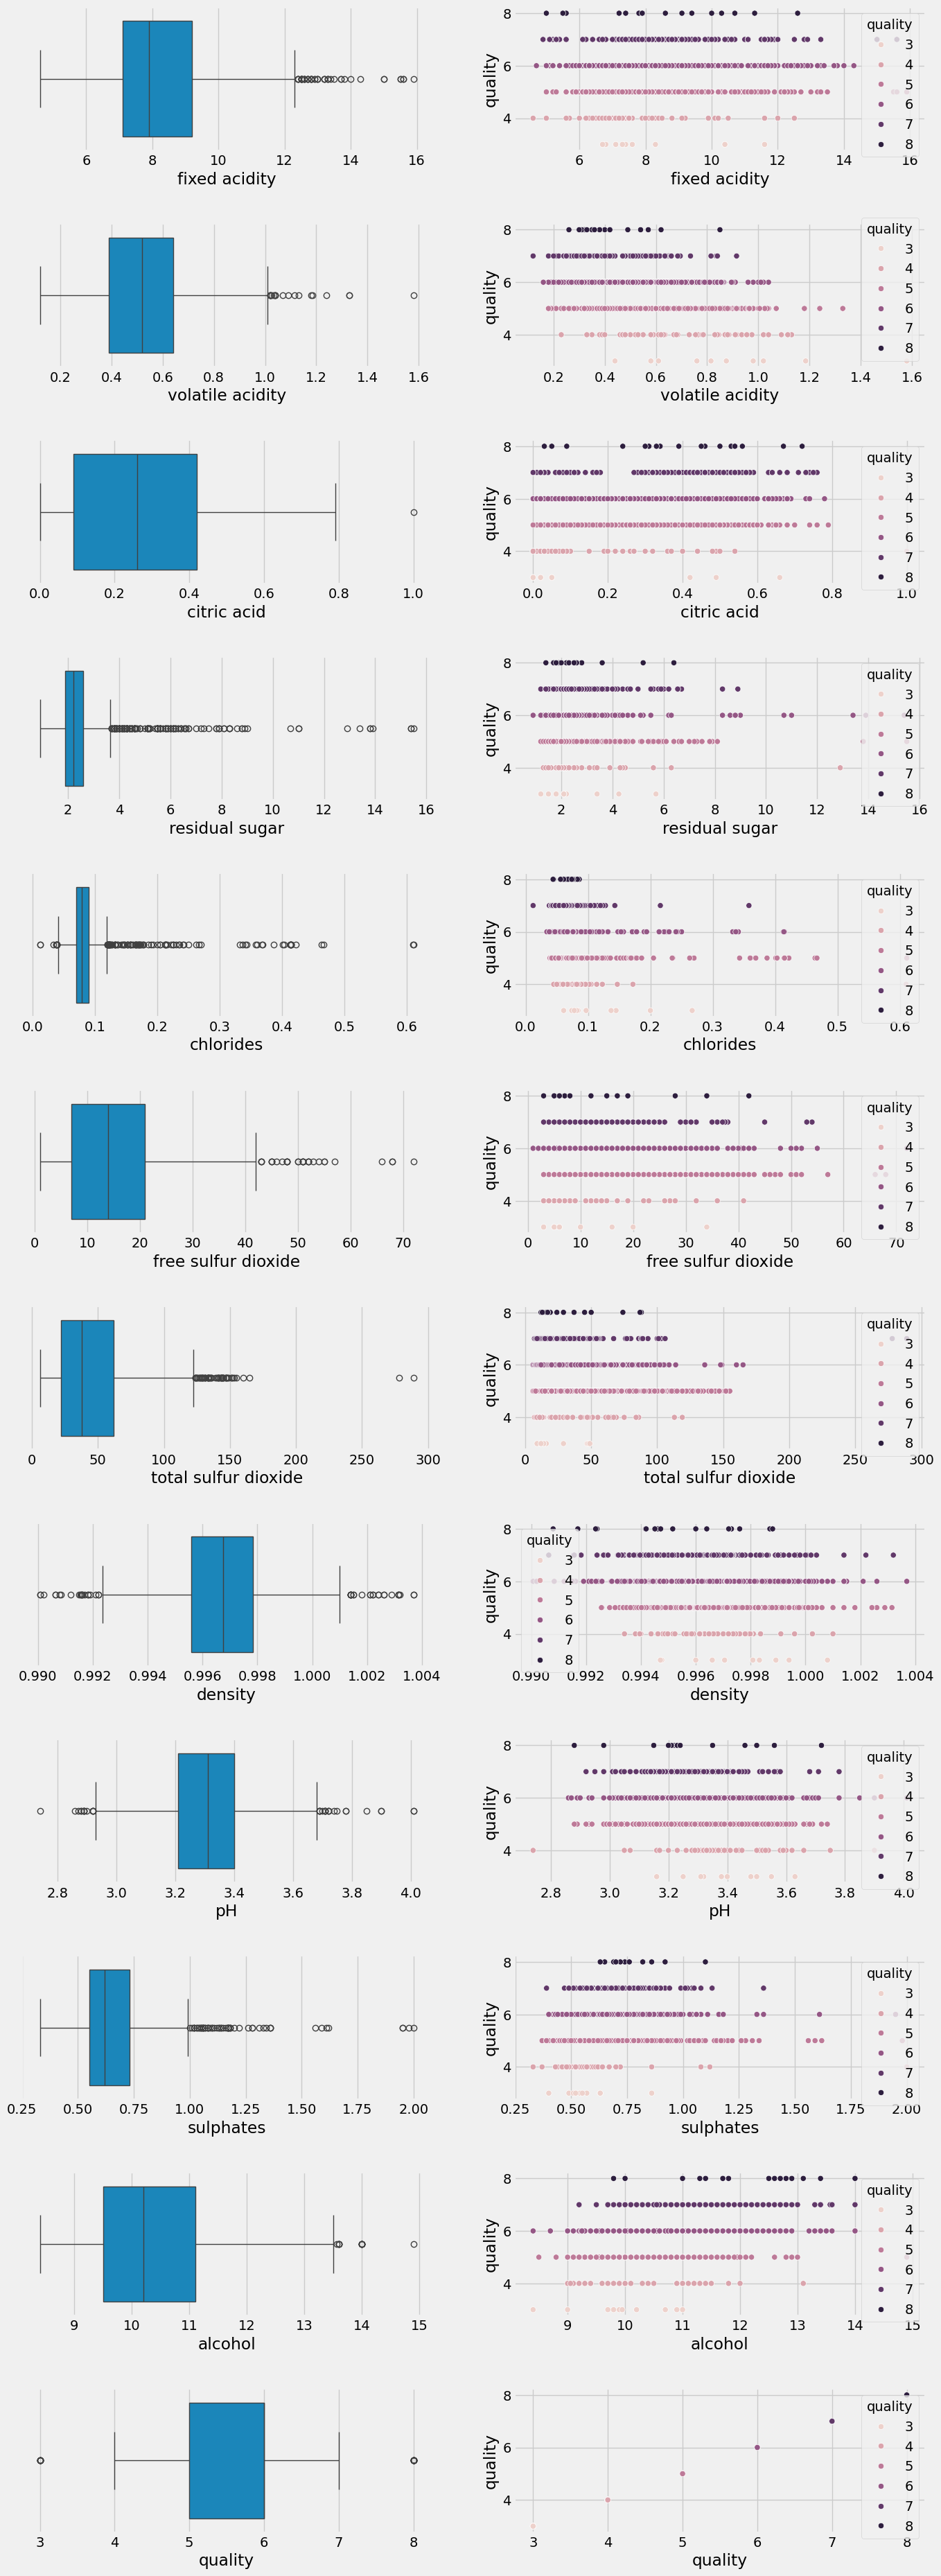

In [5]:
# Lista de columnas
columnas = list(df.columns)

# Crear subplots
fig, ax = plt.subplots(len(columnas), 2, figsize=(15, 45))
plt.subplots_adjust(hspace=0.5)

# Crear gráficos de caja y dispersión para cada columna
for i in range(len(columnas)):
    sns.boxplot(x=df[columnas[i]], ax=ax[i, 0])
    sns.scatterplot(x=df[columnas[i]], y=df['quality'], hue=df['quality'], ax=ax[i, 1])



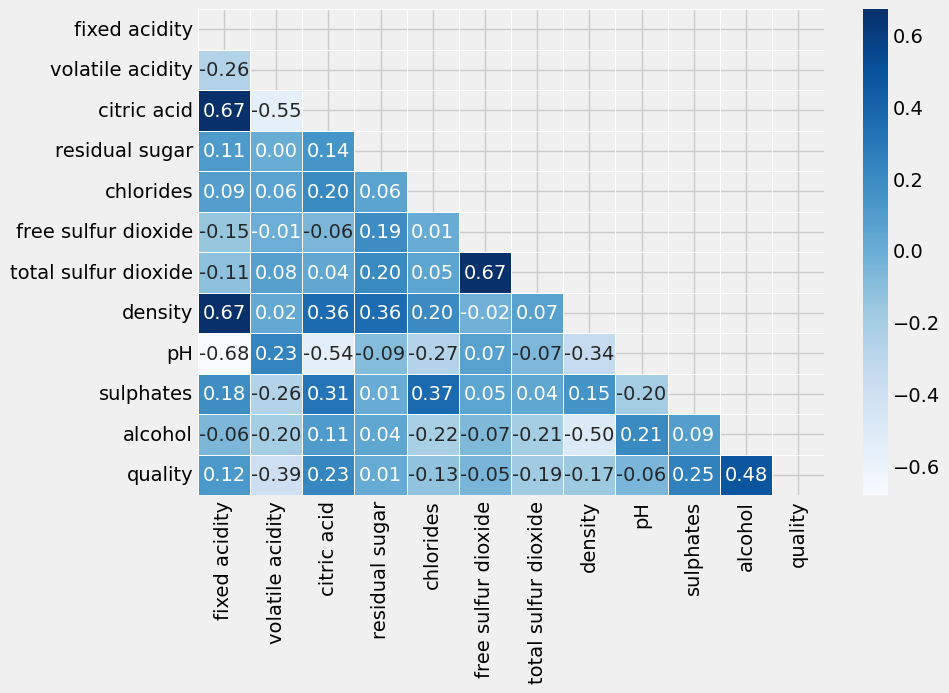

In [6]:
corr = df.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot = True, fmt = ".2f", linewidth = 0.5, cmap="Blues", mask=np.triu(corr))
plt.show()

Se pueden observar varias correlaciones fuertes y positivas, la mas notables son citrid acid con fixed acidity, density con fixed acidity y total sulfut dioxide con free sulfur dioxide. Y en la correlaciones fuertes y negativas tenemos ph con fixed acidity, ph con citric acid y volatile acidity con citric acid.

## Categorizacion de la variable a predecir

In [7]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
df = df.replace({'quality' : {
                                    8 : 'Bueno',
                                    7 : 'Bueno',
                                    6 : 'Normal',
                                    5 : 'Normal',
                                    4 : 'Malo',
                                    3 : 'Malo',
        }}
)

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Normal
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Normal
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Normal
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Normal
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Normal


## División de train y test

Aca se va dividen los datos en dos grupos, uno de entrenamiento y otro de test (80,20) con el objetivo de poder estimar el error que comete el modelo.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('quality', axis = 'columns'),
                                        df['quality'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [11]:
print("Partición de entrenamento")
print("-----------------------")
display(y_train.describe())
display(X_train.describe())

print(" ")

print("Partición de test")
print("-----------------------")
display(y_test.describe())
display(X_test.describe())


Partición de entrenamento
-----------------------


count       1279
unique         3
top       Normal
freq        1050
Name: quality, dtype: object

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.336435,0.528776,0.273174,2.550938,0.087727,15.812353,45.897576,0.996742,3.310532,0.654433,10.428668
std,1.756593,0.181222,0.196045,1.434238,0.047207,10.516511,32.668763,0.001881,0.154932,0.170651,1.063402
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.880000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995540,3.200000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,37.000000,0.996720,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.090000,21.000000,61.000000,0.997900,3.400000,0.720000,11.100000
max,15.900000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.900000


 
Partición de test
-----------------------


count        320
unique         3
top       Normal
freq         269
Name: quality, dtype: object

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.00000
mean,8.252500,0.524000,0.262188,2.490313,0.086425,16.125000,48.746875,0.996764,3.313438,0.673000,10.40026
std,1.678724,0.170364,0.189793,1.309269,0.046552,10.244197,33.741526,0.001915,0.152404,0.164276,1.07605
min,4.700000,0.120000,0.000000,0.900000,0.038000,1.000000,6.000000,0.990070,2.740000,0.400000,8.40000
25%,7.175000,0.398750,0.090000,1.900000,0.070000,7.750000,21.000000,0.995768,3.220000,0.570000,9.50000
50%,7.900000,0.520000,0.240000,2.200000,0.078500,14.000000,41.000000,0.996800,3.310000,0.650000,10.10000
75%,9.200000,0.630000,0.400000,2.600000,0.091000,23.000000,66.000000,0.997705,3.402500,0.760000,11.00000
max,14.300000,1.240000,1.000000,15.400000,0.610000,55.000000,155.000000,1.003690,3.850000,2.000000,14.00000


## Preprocesado

In [12]:
# Identificación de columnas numéricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )


preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols)
                    ],
                    remainder='passthrough'
                )

Primero se identifican las columnas numericas y categoricas, luego según cada tipo de columna se estandarizan, en el caso de las númericas utilizando la función StandardScaler() para que los datos tenga una media de 0 y una desviación estandar de 1, muy importante para que el modelo no se vea afectado por las diferentes escalas de las variables. Rn el caso de las variables categorias, se utiliza la función OneHotEncoder() lo cual convierte las categorias en variables binarias. Ya luego el preprocesador aplica las transformaciones.

In [13]:
set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['fixed acidity', 'volatile acidity',
                                  'citric acid', 'residual sugar', 'chlorides',
                                  'free sulfur dioxide', 'total sulfur dioxide',
                                  'density', 'pH', 'sulphates', 'alcohol'])])

Ahora se aplican las transformaciones de preprocessor

In [14]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

Se convierte la salida en dataframe y se añade el nombre de las columnas

In [15]:
datos_train_prep = pd.DataFrame(X_train_prep, columns=numeric_cols)
datos_train_prep.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1279 non-null   float64
 1   volatile acidity      1279 non-null   float64
 2   citric acid           1279 non-null   float64
 3   residual sugar        1279 non-null   float64
 4   chlorides             1279 non-null   float64
 5   free sulfur dioxide   1279 non-null   float64
 6   total sulfur dioxide  1279 non-null   float64
 7   density               1279 non-null   float64
 8   pH                    1279 non-null   float64
 9   sulphates             1279 non-null   float64
 10  alcohol               1279 non-null   float64
dtypes: float64(11)
memory usage: 110.0 KB


## Modelado

In [16]:
pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('modelo', MLPClassifier(solver='lbfgs', max_iter=1000, random_state=123))
])

# Definir el espacio de búsqueda de hiperparámetros
param_distributions = {
    'modelo__hidden_layer_sizes': [(10,), (20,), (10, 10)],  # Nota: (10,) es una tupla de un solo elemento
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

# Configurar la búsqueda con validación cruzada
grid = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='accuracy',  # Para clasificación se puede usar 'accuracy'
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=5,
    verbose=0,
    random_state=123,
    return_train_score=True
)

# Ajustar el modelo con los datos de entrenamiento
grid.fit(X=X_train, y=y_train)

# Extraer y mostrar los mejores resultados
resultados = pd.DataFrame(grid.cv_results_)
mejores_resultados = resultados.filter(regex='(param.*|mean_t|std_t)').drop(columns='params') \
                                  .sort_values('mean_test_score', ascending=False) \
                                  .head(10)
print(mejores_resultados)

    param_modelo__learning_rate_init param_modelo__hidden_layer_sizes  \
3                              0.010                            (10,)   
18                             0.001                            (10,)   
21                             0.001                            (20,)   
4                              0.010                            (10,)   
48                             0.010                         (10, 10)   
45                             0.001                         (10, 10)   
7                              0.001                         (10, 10)   
34                             0.010                         (10, 10)   
49                             0.001                            (20,)   
0                              0.001                            (10,)   

    param_modelo__alpha  mean_test_score  std_test_score  mean_train_score  \
3              2.154435         0.841265        0.013885          0.870404   
18             2.154435         0.841265


## Elección de la Arquitectura de la Red

### Número de capas y número de neuronas

El modelo usa un **MLPClassifier** de `scikit-learn`, que permite definir capas ocultas con diferentes cantidades de neuronas. En el código:

```python
'modelo__hidden_layer_sizes': [(10,), (20,), (10, 10)]
```

- **(10,)** → 1 capa oculta con 10 neuronas.
- **(20,)** → 1 capa oculta con 20 neuronas.
- **(10, 10)** → 2 capas ocultas con 10 neuronas cada una.

El mejor número de capas y neuronas se selecciona mediante `RandomizedSearchCV`, lo que permite probar distintas configuraciones y elegir la que maximice la precisión.

### Funciones de Activación

`MLPClassifier` usa la función **ReLU** por defecto en las capas ocultas y **Softmax** en la capa de salida. 

La función de activación ReLU se define como:

\$
f(z) = \max(0, z)
\$

La función Softmax en la capa de salida convierte los valores en probabilidades:

\$
\hat{y}_i = 
rac{e^{z_i}}{\sum_{j} e^{z_j}}
\$

Esto es adecuado para tareas de clasificación como la predicción de calidad del vino.

### Hiperparámetros

El código ajusta hiperparámetros usando una búsqueda aleatoria (`RandomizedSearchCV`):

```python
param_distributions = {
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01]
}
```

- **Learning Rate (`learning_rate_init`)**: Se prueba con valores de **0.001 y 0.01**. Esto controla cuánto ajustan los pesos en cada iteración.
- **Batch Size**: `MLPClassifier` en `scikit-learn` usa `lbfgs`, que es un optimizador sin mini-batches, por lo que usa toda la data en cada iteración.
- **Epochs (`max_iter`)**: El modelo se entrena por **1000 iteraciones** (`max_iter=1000`), lo que define cuántas veces pasa por los datos.

## Forward Pass

El forward pass en `MLPClassifier` funciona de la siguiente manera:

1. Se calcula la activación de la primera capa oculta:

\$
z^{(1)} = W^{(1)} X + b^{(1)}
\$

\$
a^{(1)} = f(z^{(1)}) = \max(0, z^{(1)})
\$

2. Se pasa a la siguiente capa oculta (si existe) y se repite el proceso.

3. En la capa de salida, se usa la función **Softmax** para convertir los valores en probabilidades.

## Backpropagation

El `MLPClassifier` optimiza los pesos usando **retropropagación con gradiente descendente**:

1. **Calcula el error** entre la predicción y la salida real.
2. **Propaga el error hacia atrás**, ajustando los pesos:

\$
\Delta W = - \eta 
rac{\partial L}{\partial W}
\$

El optimizador `lbfgs` es una variante del método de Newton, que ajusta los pesos más rápido en algunos casos.

## Función de Pérdida

Para este problema de clasificación, la función de pérdida utilizada es **Cross-Entropy Loss**:

\$
L = - \sum_{i=1}^{N} y_i \log(\hat{y}_i)
\$

Donde:
- \( y_i \) es la verdadera clase de la muestra \( i \).
- \( \hat{y}_i \) es la probabilidad predicha por la red.

Esto penaliza más las predicciones incorrectas con alta confianza.

## Proceso de Entrenamiento

El código entrena la red neuronal con `RandomizedSearchCV`:

```python
grid.fit(X=X_train, y=y_train)
```

El entrenamiento sigue estos pasos:
1. **Inicializa pesos aleatoriamente**.
2. **Realiza forward pass** en cada muestra del dataset.
3. **Calcula la pérdida** usando cross-entropy.
4. **Propaga el error hacia atrás** y ajusta los pesos.
5. **Repite el proceso por 1000 iteraciones** (`max_iter=1000`).
6. **Optimiza los hiperparámetros** con validación cruzada (`cv=5`).

Los mejores parámetros se seleccionan usando:

```python
mejores_resultados = resultados.filter(regex='(param.*|mean_t|std_t)').sort_values('mean_test_score', ascending=False).head(10)
print(mejores_resultados)
```

Esto devuelve las configuraciones con mejor precisión.

## Visualización de resultados

A continuación, se visualiza la evolución de la pérdida a lo largo del entrenamiento:

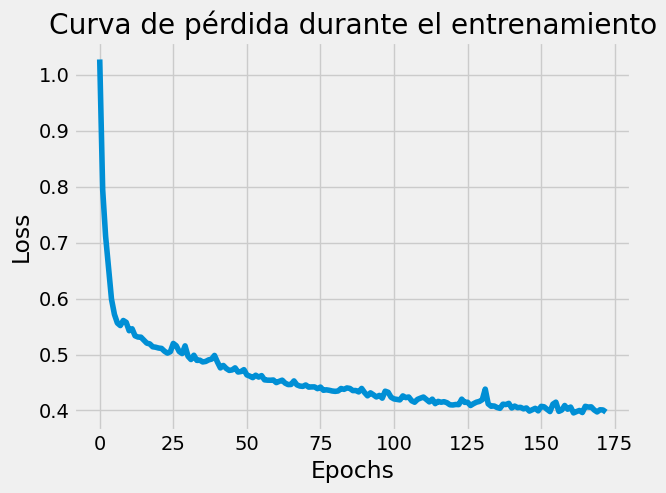

In [34]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Asegúrate de que tu modelo tenga el solver 'adam' o 'sgd'
model = MLPClassifier(solver='adam', max_iter=1000, random_state=123)

# Ajusta tu modelo a los datos
model.fit(X_train, y_train)  # Reemplaza X_train y y_train con tus datos de entrenamiento

# Verifica si el modelo tiene la curva de pérdida
if hasattr(model, 'loss_curve_'):
    plt.plot(model.loss_curve_)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Curva de pérdida durante el entrenamiento')
    plt.show()
else:
    print("El modelo no tiene una curva de pérdida disponible.")

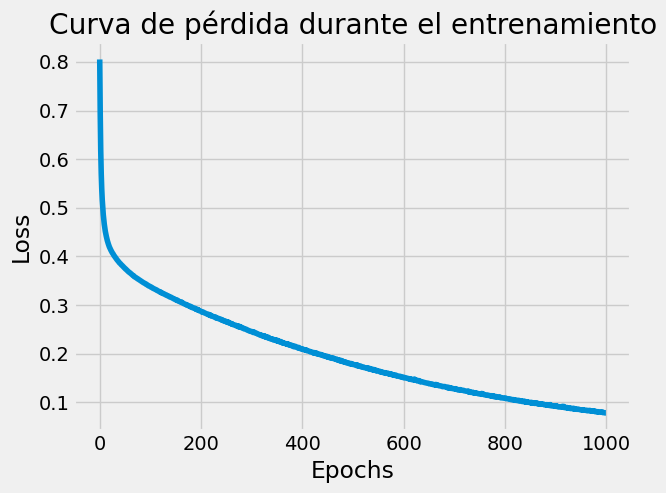

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Definir el preprocesamiento para los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline(steps=[('scaler', StandardScaler())]),
         ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
          'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
    ],
    remainder='passthrough'
)

# Definir el pipeline completo (preprocesamiento + modelo)
mi_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('modelo', MLPClassifier(max_iter=1000, random_state=123))  # Inicializa el modelo
])

# Define el grid de parámetros para el MLP
param_grid = {
    'modelo__solver': ['adam', 'sgd'],  # Ajusta según el nombre de tu modelo en el pipeline
    'modelo__max_iter': [1000]
}

# Usar GridSearchCV con el pipeline definido
grid = GridSearchCV(estimator=mi_pipeline, param_grid=param_grid, cv=5)

# Entrenar el modelo con tus datos (reemplaza X_train, y_train con tus datos)
grid.fit(X_train, y_train)

# Accede al mejor modelo
best_model = grid.best_estimator_.named_steps['modelo']

# Verifica si el modelo tiene la curva de pérdida
if hasattr(best_model, 'loss_curve_'):
    plt.plot(best_model.loss_curve_)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Curva de pérdida durante el entrenamiento')
    plt.show()
else:
    print("El modelo no tiene una curva de pérdida disponible.")